<div style="font-family: 'Georgia', 'Garamond', serif; 
            font-size: 22px; 
            background-color: #A8C686; 
            color: #FFFFFF; 
            font-weight: bold; 
            text-align: center; 
            padding: 0px 0px; 
            border-radius: 0; 
            width: 100%; 
            letter-spacing: 1px;">
    Regresi dengan Data Random
</div>


In [1]:
import pandas as pd
import numpy as np

np.random.seed(6)
x = 4.3 * np.random.rand(500) + 9.7
stddev = 4.3
res = 5.1 * np.random.randn(500)
y = 4 + 0.9 * x + res

df = pd.DataFrame(
{'X': x,
 'y': y}
 )

df.head()

,X,y
0,13.539299,17.182614
1,11.127513,18.669184
2,13.231285,8.696878
3,9.879295,3.244786
4,10.162924,3.767600


<div style="font-family: 'Georgia', 'Garamond', serif; 
            font-size: 22px; 
            background-color: #A8C686; 
            color: #FFFFFF; 
            font-weight: bold; 
            text-align: center; 
            padding: 0px 0px; 
            border-radius: 0; 
            width: 100%; 
            letter-spacing: 1px;">
    Regresi Sederhana
</div>


alpha = 0.8907280766563801
beta = 1.1397149692544715


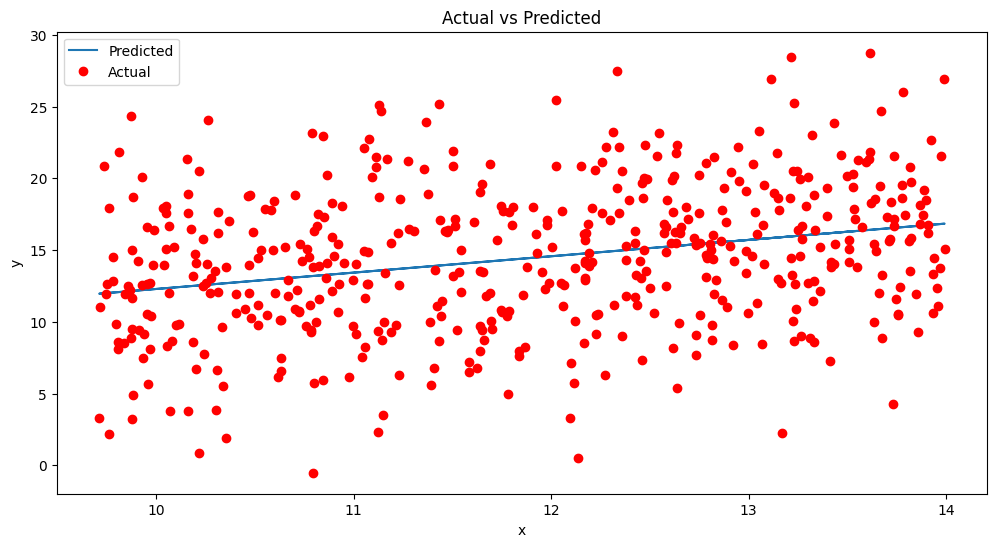

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Masukkan ke DataFrame
df = pd.DataFrame({
    "x1": x,
    "y": y
})

# Hitung mean
xmean = np.mean(x)
ymean = np.mean(y)

# Hitung covariance dan variance
df["xycov"] = (df["x1"] - xmean) * (df["y"] - ymean)
df["xvar"] = (df["x1"] - xmean)**2

# Hitung beta & alpha
beta = df["xycov"].sum() / df["xvar"].sum()
alpha = ymean - (beta * xmean)
print(f"alpha = {alpha}")
print(f"beta = {beta}")

# Prediksi
ypred = alpha + beta * x

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, ypred, label="Predicted")
plt.plot(x, y, "ro", label="Actual")
plt.title("Actual vs Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


<div style="font-family: 'Georgia', 'Garamond', serif; 
            font-size: 22px; 
            background-color: #A8C686; 
            color: #FFFFFF; 
            font-weight: bold; 
            text-align: center; 
            padding: 0px 0px; 
            border-radius: 0; 
            width: 100%; 
            letter-spacing: 1px;">
   Regresi dan Plot 3D
</div>

In [3]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import statsmodels.api as sm

#Mengahasilkan data acak
np.random.seed(33)
x1 = np.random.randint(1, 7, 62)
x2 = np.random.randint(9, 31, 62)
y = 10 + 2 * x1 + 3 * x2 + np.random.normal(0, 71, 62)

#Membuat dataframe
df = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "y": y
})

#Analisis regresi berganda
x =sm.add_constant(df[["x1", "x2"]])
model = sm.OLS(df["y"], x).fit()

#Mendapatkan koefisien regresi
koefisien = model.params

#Scatter plot 3D
scatter_plot = go.Scatter3d(
    x=df["x1"],
    y=df["x2"],
    z=df["y"], 
    mode="markers",
    marker=dict(
        size=5,
        color="blue",
        opacity=0.8
    ),
    name="Data"
)

#Membuat grid untuk permukaan regresi
x1_grid, x2_grid = np.meshgrid(np.linspace(1, 50, 10), np.linspace(3, 60, 10))
y_pred = koefisien.iloc[0] + koefisien.iloc[1] * x1_grid + koefisien.iloc[2] * x2_grid

#Permukaan regresi 3D
regresion_surface = go.Surface(
    x=x1_grid,
    y=x2_grid,
    z=y_pred,
    colorscale="Reds",
    opacity=0.5,
    name="Garis Regresi"
)

#Membuat layout plot
layout = go.Layout(
    title="Scatter Plot 3D dengan Garis Regresi Berganda",
    scene=dict(
        xaxis_title="x1",
        yaxis_title="x2",
        zaxis_title="y"
    ),
    showlegend=True 
)

#Membuat figure dengan scatter plot dan permukaan regresi
fig = go.Figure(data=[scatter_plot, regresion_surface], layout=layout)

#Menampilkan plot
fig.show()